# Prescriptive-Analytics-Project2-Beijing-Air-Quality-Data-Set

## Machine Learning and Data Mining project, in this project we would try to predict air pollution in Beijing, China, using the data set "Beijing Multi-Site Air-Quality Data Data Set"

## Autores: Marco Quichimbo e Isaac Reyes

### Task 1: Data import, cleanup, and preprocessing


Focus should be on importing the data provided in a suitable format so that subsequent analysis is more easy. Also verify if it is necessary to perform any data cleaning and/or preprocessing steps.



In [ ]:
#libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import missingno as msno #solo para datos perdidos//datos nulos

In [ ]:
#load the data of Aotizhongxin location
df = pd.read_csv(filepath_or_buffer = '/content/MOd_PRSA_Data_Aotizhongxin_20130301-20170228.csv', sep=',')

### Identify possible variables  to be deleted
No = Row number, don't apport any relevant information \
Station = Name of the air-quality monitoring site, don't apport relevant information

In [ ]:
#drop variables
variables_to_delete = ['No', 'station']
df = df.drop(variables_to_delete,axis = 1)

### Cleaning process

In [ ]:
# A brief summary of the data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,35064.0,2014.662560,1.177213,2013.0000,2014.00,2015.0,2016.00,2017.0
month,35064.0,6.522930,3.448752,1.0000,4.00,7.0,10.00,12.0
day,35064.0,15.729637,8.800218,1.0000,8.00,16.0,23.00,31.0
hour,35064.0,11.500000,6.922285,0.0000,5.75,11.5,17.25,23.0
PM2.5,34139.0,82.773611,82.135694,3.0000,22.00,58.0,114.00,898.0
PM10,34346.0,110.060391,95.223005,2.0000,38.00,87.0,155.00,984.0
SO2,34129.0,17.375901,22.823017,0.2856,3.00,9.0,21.00,341.0
NO2,34041.0,59.305833,37.116200,2.0000,30.00,53.0,82.00,290.0
CO,33288.0,1262.945145,1221.436236,100.0000,500.00,900.0,1500.00,10000.0
O3,33345.0,56.353358,57.916327,0.2142,8.00,42.0,82.00,423.0


RAIN variable looks strange, there is no variability \
We could delete this one

In [ ]:
unique_rain = df['RAIN'].value_counts()
unique_rain

0.0     33664
0.1       314
0.2       161
0.3       107
0.5        73
        ...  
12.9        1
13.6        1
4.2         1
5.0         1
5.1         1
Name: RAIN, Length: 127, dtype: int64

In [ ]:
#delete rain variable
df = df.drop(['RAIN'], axis = 1)

Dependences between variables

<ipython-input-8-bba46f8d1590>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),vmax=0.7,annot=True,cmap='GnBu')


<Axes: title={'center': 'Pearson'}>

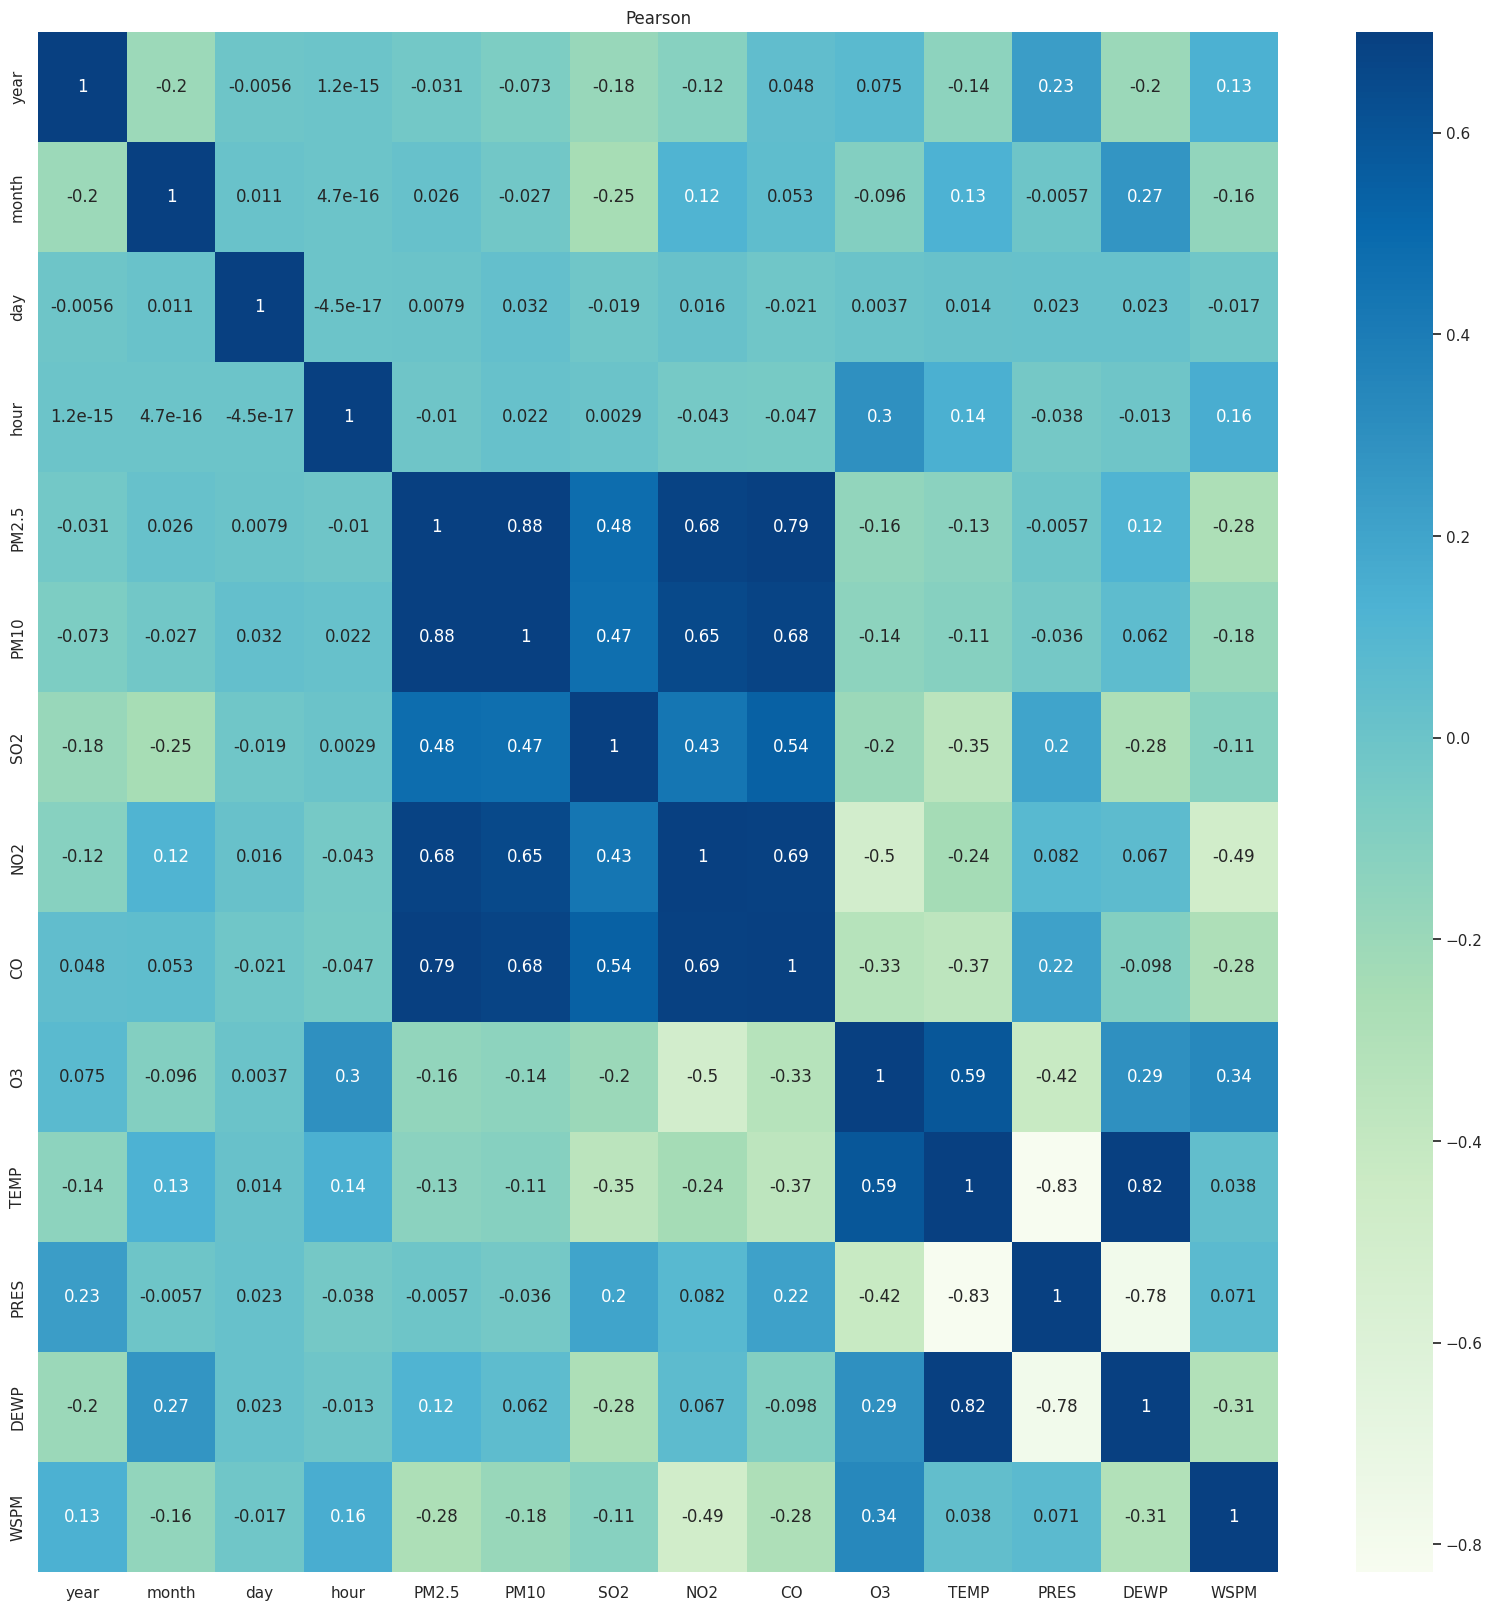

In [ ]:
#Person to identify variables dependences
sns.set(style='whitegrid',font_scale=1)
plt.figure(figsize=(20,20))
plt.title('Pearson')
sns.heatmap(df.corr(),vmax=0.7,annot=True,cmap='GnBu')

We apreciate a strong relation between PM10 & PM2.5\
Conserve PM10 because it's one of the five parameters to *AQI*, and delete the other one

In [ ]:
#delete PM2.5
df = df.drop(['PM2.5'], axis=1)

<ipython-input-10-bba46f8d1590>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),vmax=0.7,annot=True,cmap='GnBu')


<Axes: title={'center': 'Pearson'}>

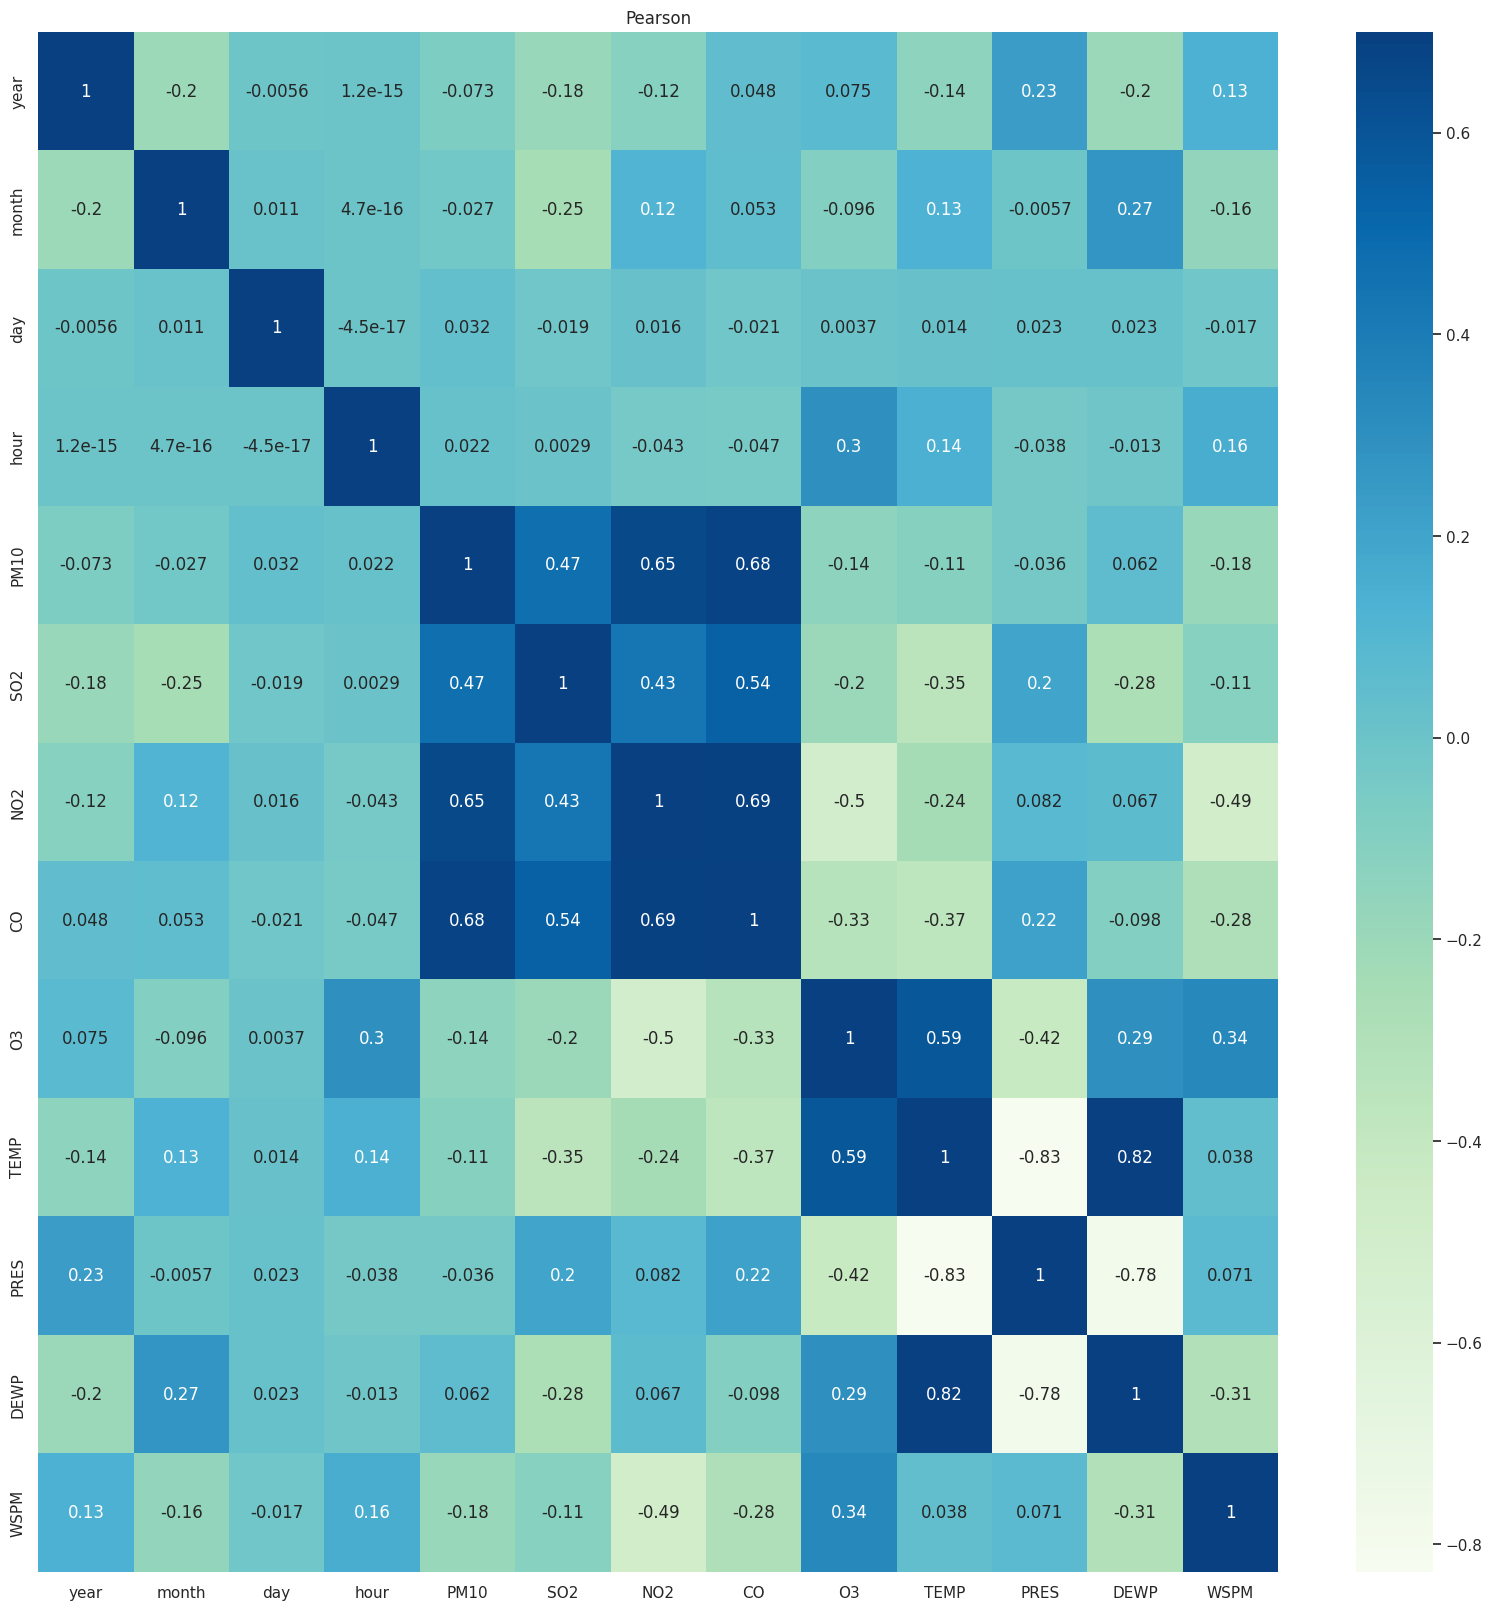

In [ ]:
#Person to identify variables dependences
sns.set(style='whitegrid',font_scale=1)
plt.figure(figsize=(20,20))
plt.title('Pearson')
sns.heatmap(df.corr(),vmax=0.7,annot=True,cmap='GnBu')

### Work around null values

In [ ]:
# what kind of datatype I'm working with
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    35064 non-null  int64  
 1   month   35064 non-null  int64  
 2   day     35064 non-null  int64  
 3   hour    35064 non-null  int64  
 4   PM10    34346 non-null  float64
 5   SO2     34129 non-null  float64
 6   NO2     34041 non-null  float64
 7   CO      33288 non-null  float64
 8   O3      33345 non-null  float64
 9   TEMP    35044 non-null  float64
 10  PRES    35044 non-null  float64
 11  DEWP    35044 non-null  float64
 12  wd      34983 non-null  object 
 13  WSPM    35050 non-null  float64
dtypes: float64(9), int64(4), object(1)
memory usage: 3.7+ MB


We have a categorical variable with null values \
The other ones are numeric values

In [ ]:
#identify null values
df.isnull().sum()

year        0
month       0
day         0
hour        0
PM10      718
SO2       935
NO2      1023
CO       1776
O3       1719
TEMP       20
PRES       20
DEWP       20
wd         81
WSPM       14
dtype: int64

null values in the categorical variable are 81, it's means we could delete the null values, it is a very small portion of the data set

In [ ]:
#delele categoriacal wd registers
df = df.dropna(subset=['wd'])

In [ ]:
df.isnull().sum()

year        0
month       0
day         0
hour        0
PM10      718
SO2       935
NO2      1023
CO       1775
O3       1714
TEMP        6
PRES        6
DEWP        6
wd          0
WSPM        0
dtype: int64

As you can appreciate, the numeric null values are less than 30% of the data, so we can imput, null values

In [ ]:
#we imput whit the mean
column_to_imput = ['PM10','SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', ]

for columna in column_to_imput:
    media = df[columna].mean()
    df[columna] = df[columna].fillna(media)


<ipython-input-15-e2e590bffd3b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columna] = df[columna].fillna(media)


In [ ]:
#just to confirm, there's no null values
df.isnull().sum()

year     0
month    0
day      0
hour     0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
wd       0
WSPM     0
dtype: int64

<Axes: >

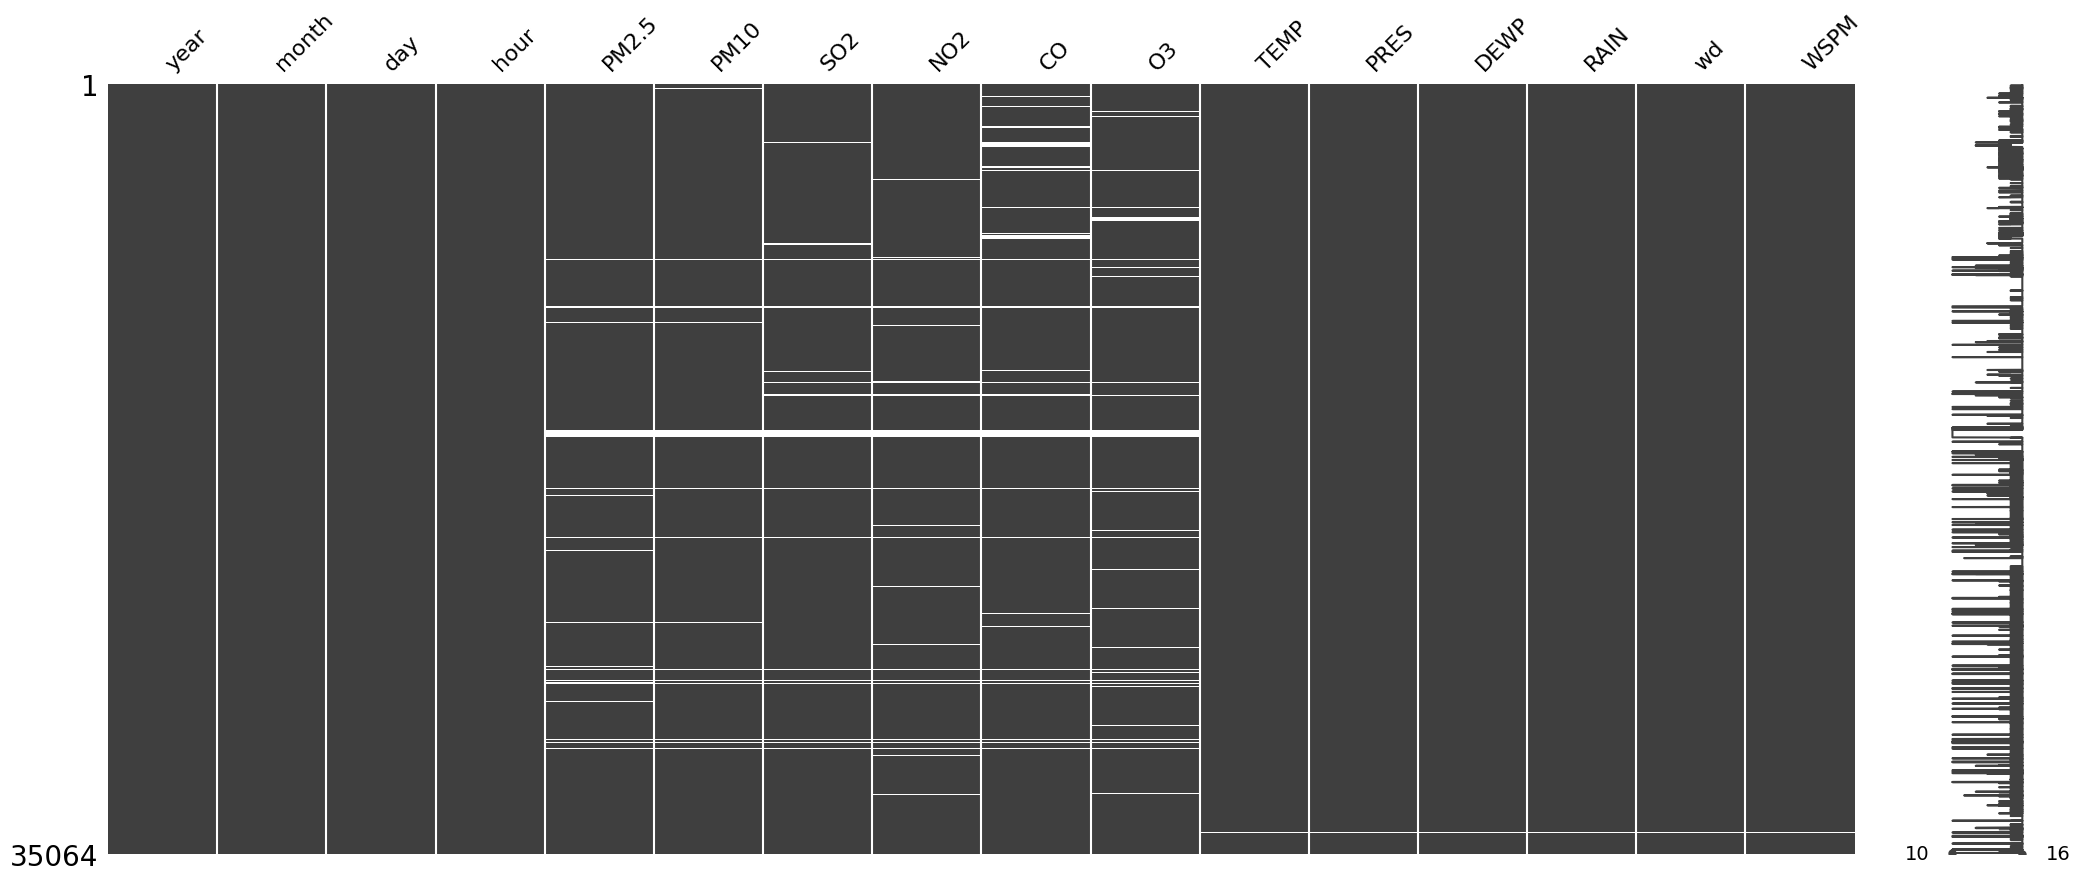

In [ ]:
msno.matrix(df)
#msno.bar(df)

General view of how the data is distributed

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'hour'}>],
       [<Axes: title={'center': 'PM10'}>,
        <Axes: title={'center': 'SO2'}>, <Axes: title={'center': 'NO2'}>,
        <Axes: title={'center': 'CO'}>],
       [<Axes: title={'center': 'O3'}>, <Axes: title={'center': 'TEMP'}>,
        <Axes: title={'center': 'PRES'}>,
        <Axes: title={'center': 'DEWP'}>],
       [<Axes: title={'center': 'WSPM'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

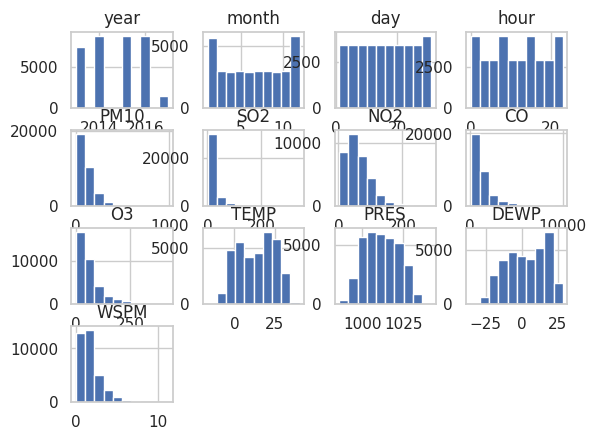

In [ ]:
#general view of the data
df.hist()

### Working around outliers

In [ ]:
#cut off 10% of tails
for i in f:
  q1 = df[i].quantile(0.1)
  q4 = df[i].quantile(0.9)
  df[i][df[i]<=q1] =q1
  df[i][df[i]>=q4] =q4

<ipython-input-26-4c6acfeabf44>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i]>=q4] =q4
<ipython-input-26-4c6acfeabf44>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i]>=q4] =q4
<ipython-input-26-4c6acfeabf44>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i]>=q4] =q4
<ipython-input-26-4c6acfeabf44>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See th

TypeError: ignored

base limpia

<Axes: >

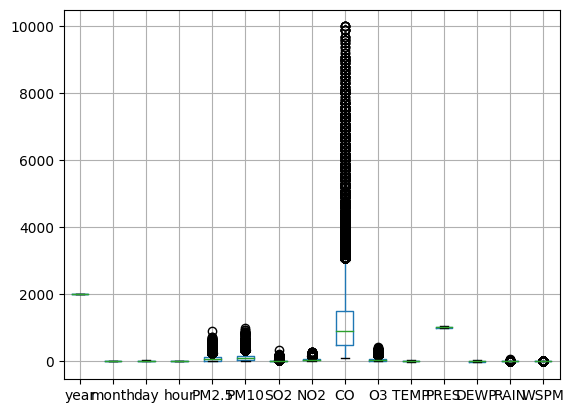

In [ ]:
df.boxplot()